In [1]:
import numpy as np
import pandas as pd

import sklearn.neighbors as neighbors

from importlib import reload
import copy
import synthetic.render.generator as gen

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import multiprocessing as mp

import sys
import os
import math
import logging
import time
import galsim
import fitsio as fio

import ngmix

import synthetic.render.render as render
import synthetic.render.icl as icl
import synthetic.render.frame as frame

import images
import meds
import subprocess

In [48]:
catalogs = []
catalog_tag = '/e/ocean1/users/vargatn/DES/SIM_DATA/SKY_MODEL_EPSILON/res_clust_v2_z0l0/epsilon_clust_v8-z0l0_15000_{:03d}.fits'
for i in np.arange(1):
    fname = catalog_tag.format(i)
    data = fio.read(fname)
    catalog_cluster = data[data['LOC'] == 1]
    catalog_field = data[data['LOC'] == 0]
    catalog = np.hstack((catalog_cluster, catalog_field))
    catalog['G1'] = 0.3
    catalog['G2'] = -0.2
    catalogs.append(catalog)

In [106]:
x = np.linspace(201, 4800, 20) + 2500
y = np.linspace(201, 4800, 20) + 2500
xx, yy = np.meshgrid(x, y)
xx = xx.flatten()
yy = yy.flatten()

In [107]:
star_catalog = copy.deepcopy(catalog[:400])
star_catalog[:] = 0
mag = 30  - 2.5 * np.log10(5e4)

In [108]:
star_catalog["X"] = xx 
star_catalog["Y"] = yy
star_catalog["FLUX_G"][:] = 5e4
star_catalog["FLUX_R"][:] = 5e4
star_catalog["FLUX_I"][:] = 5e4
star_catalog["FLUX_Z"][:] = 5e4
star_catalog["TSIZE"][:] = 1e-3
star_catalog["MAG_G"][:] = mag
star_catalog["MAG_R"][:] = mag
star_catalog["MAG_I"][:] = mag
star_catalog["MAG_Z"][:] = mag
star_catalog["FRACDEV"][:] = mag


In [109]:
rd = render.DrawField(5000., star_catalog)

In [110]:
reload(render)

<module 'synthetic.render.render' from '/home/moon/vargatn/DES/SYNTHETIC/synthetic/synthetic/render/render.py'>

In [111]:
rd.prepare()
rd.make_wcs()
rd.make_infodicts()
rd.multi_render(100)

starting xshear calculations in 100 processes
galsim.BoundsI(3097,3114,1403,1420)galsim.BoundsI(1161,1178,4792,4809)galsim.BoundsI(1161,1178,435,452)


galsim.BoundsI(1403,1420,435,452)
galsim.BoundsI(3097,3114,1161,1178)galsim.BoundsI(1403,1420,4792,4809)galsim.BoundsI(3339,3356,1403,1420)


galsim.BoundsI(1645,1662,435,452)
galsim.BoundsI(3339,3356,1161,1178)
galsim.BoundsI(3581,3598,1403,1420)galsim.BoundsI(1645,1662,4792,4809)

galsim.BoundsI(1887,1904,435,452)
galsim.BoundsI(3581,3598,1161,1178)galsim.BoundsI(3823,3840,1403,1420)

galsim.BoundsI(1887,1904,4792,4809)
galsim.BoundsI(3097,3114,4307,4324)
galsim.BoundsI(3823,3840,1161,1178)
galsim.BoundsI(3339,3356,4307,4324)
galsim.BoundsI(3581,3598,4307,4324)
galsim.BoundsI(3823,3840,4307,4324)
galsim.BoundsI(4065,4082,2613,2630)
galsim.BoundsI(3097,3114,677,694)galsim.BoundsI(2129,2146,1887,1904)

galsim.BoundsI(4065,4082,3581,3598)galsim.BoundsI(4307,4324,2613,2630)

galsim.BoundsI(3339,3356,677,694)
galsim.BoundsI(2371,2388,1887,

galsim.BoundsI(435,452,4792,4809)
galsim.BoundsI(4792,4809,1887,1904)
galsim.BoundsI(677,694,4792,4809)
galsim.BoundsI(919,936,4792,4809)
galsim.BoundsI(4065,4082,3097,3114)
galsim.BoundsI(4065,4082,3823,3840)
galsim.BoundsI(4307,4324,3097,3114)galsim.BoundsI(3097,3114,193,210)

galsim.BoundsI(4307,4324,3823,3840)
galsim.BoundsI(1161,1178,3339,3356)galsim.BoundsI(4549,4566,3097,3114)

galsim.BoundsI(3339,3356,193,210)
galsim.BoundsI(4792,4809,3097,3114)galsim.BoundsI(1403,1420,3339,3356)galsim.BoundsI(4549,4566,3823,3840)


galsim.BoundsI(3581,3598,193,210)
galsim.BoundsI(1645,1662,3339,3356)
galsim.BoundsI(3823,3840,193,210)
galsim.BoundsI(4792,4809,3823,3840)galsim.BoundsI(1887,1904,3339,3356)

galsim.BoundsI(193,210,677,694)
galsim.BoundsI(435,452,677,694)galsim.BoundsI(3097,3114,3097,3114)

galsim.BoundsI(677,694,677,694)
galsim.BoundsI(3097,3114,4065,4082)galsim.BoundsI(3339,3356,3097,3114)

galsim.BoundsI(919,936,677,694)galsim.BoundsI(1161,1178,3581,3598)

galsim.BoundsI(3581,35

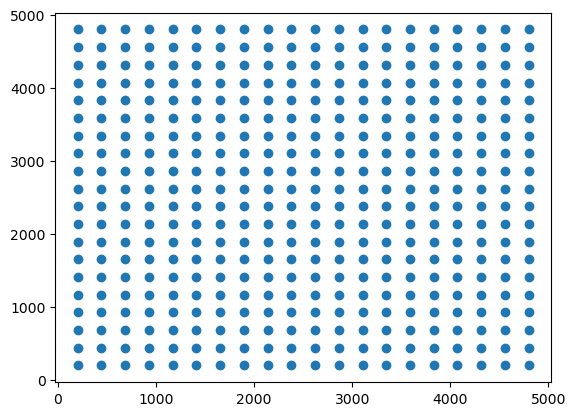

In [112]:
plt.scatter(rd.xx, rd.yy)

In [113]:
rd.collate_stamps()

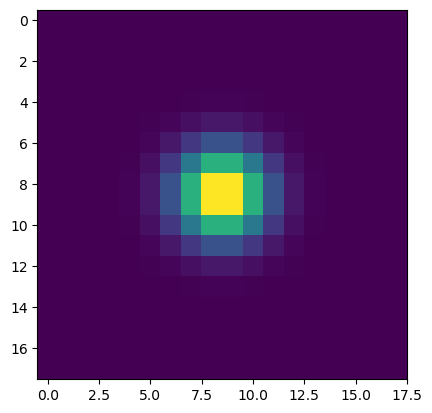

In [114]:
plt.imshow(rd.stamps[0].array)

In [49]:
fr.df.xx

array([-4800.        , -4557.89473684, -4315.78947368, -4073.68421053,
       -3831.57894737, -3589.47368421, -3347.36842105, -3105.26315789,
       -2863.15789474, -2621.05263158, -2378.94736842, -2136.84210526,
       -1894.73684211, -1652.63157895, -1410.52631579, -1168.42105263,
        -926.31578947,  -684.21052632,  -442.10526316,  -200.        ,
       -4800.        , -4557.89473684, -4315.78947368, -4073.68421053,
       -3831.57894737, -3589.47368421, -3347.36842105, -3105.26315789,
       -2863.15789474, -2621.05263158, -2378.94736842, -2136.84210526,
       -1894.73684211, -1652.63157895, -1410.52631579, -1168.42105263,
        -926.31578947,  -684.21052632,  -442.10526316,  -200.        ,
       -4800.        , -4557.89473684, -4315.78947368, -4073.68421053,
       -3831.57894737, -3589.47368421, -3347.36842105, -3105.26315789,
       -2863.15789474, -2621.05263158, -2378.94736842, -2136.84210526,
       -1894.73684211, -1652.63157895, -1410.52631579, -1168.42105263,
      

In [22]:
! sex canvas_000.fits -c config.sex -CATALOG_TYPE FITS_LDAC -CATALOG_NAME canvas_000_cat.ldac -CHECKIMAGE_NAME canvas_000_seg.fits

> 
----- SExtractor 2.25.0 started on 2022-10-10 at 13:32:55 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for canvas_000.fits
----- Measuring from: canvas_000.fits
      "Unnamed" / no ext. header / 5000x5000 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
> Setting up background map at line:  832
> Setting up bac

> Line: 1350  Objects:     1812 detected /       77 sextracted
> Line: 1375  Objects:     1877 detected /       97 sextracted
> Line: 1400  Objects:     1929 detected /      129 sextracted
> Line: 1425  Objects:     1975 detected /      158 sextracted
> Line: 1450  Objects:     2044 detected /      186 sextracted
> Line: 1475  Objects:     2104 detected /      223 sextracted
> Line: 1500  Objects:     2151 detected /      267 sextracted
> Line: 1525  Objects:     2207 detected /      295 sextracted
> Line: 1550  Objects:     2270 detected /      329 sextracted
> Line: 1575  Objects:     2330 detected /      354 sextracted
> Line: 1600  Objects:     2400 detected /      392 sextracted
> Line: 1604  Objects:     2409 detected /      400 sextracted
> Line: 1625  Objects:     2458 detected /      425 sextracted
> Line: 1650  Objects:     2528 detected /      454 sextracted
> Line: 1675  Objects:     2593 detected /      482 sextracted
> Line: 1700  Objects:     2660 detected /      523 sex

> Line: 3900  Objects:     8377 detected /     5791 sextracted
> Line: 3925  Objects:     8439 detected /     5864 sextracted
> Line: 3950  Objects:     8501 detected /     5939 sextracted
> Line: 3972  Objects:     8539 detected /     6000 sextracted
> Line: 3975  Objects:     8542 detected /     6014 sextracted
> Line: 4000  Objects:     8587 detected /     6065 sextracted
> Line: 4025  Objects:     8635 detected /     6124 sextracted
> Line: 4050  Objects:     8688 detected /     6195 sextracted
> Line: 4075  Objects:     8732 detected /     6263 sextracted
> Line: 4100  Objects:     8782 detected /     6321 sextracted
> Line: 4125  Objects:     8829 detected /     6370 sextracted
> Line: 4142  Objects:     8863 detected /     6400 sextracted
> Line: 4150  Objects:     8875 detected /     6419 sextracted
> Line: 4175  Objects:     8921 detected /     6483 sextracted
> Line: 4200  Objects:     8967 detected /     6539 sextracted
> Line: 4225  Objects:     9007 detected /     6599 sex

In [33]:
!psfex canvas_000_cat.ldac -c psfex.config


> WARNING: This executable has been compiled using a version of the ATLAS library without support for multithreading. Performance will be degraded.

.
----- PSFEx 3.21.1 started on 2022-10-10 at 14:55:39 with 160 threads

.
----- 1 input catalogues:
canvas_000_cat.ldac :  "no ident        "    1 extension    9347 detections

Initializing contexts....
Computing optimum PSF sampling steps....
Reading data from canvas_000_cat....

> WARNING: No source with appropriate FWHM found!!

Computing final PSF model for canvas_000_cat....
Computing diagnostics for canvas_000_cat....

> WARNING: No source with appropriate FWHM found!!

canvas_000_cat               0/0       0.75   0.00   0.00  0.00  1.00  1.00
Saving CHECK-image #1....
Saving CHECK-image #2....
Saving CHECK-image #3....
Saving CHECK-image #4....
Saving CHECK-image #5....
Saving PSF model and metadata for canvas_000_cat....
Writing XML file....
.


In [25]:
ff = fio.FITS('canvas_000_cat.ldac')

In [30]:
51 / 41

1.2439024390243902

In [ ]:
imcat_ldac_name=imagefile.replace('.fits','_cat.ldac')

        bkgname=imagefile.replace('.fits','.sub.fits')
        bkg_arg = '-CHECKIMAGE_NAME ' + bkgname

        cmd = ' '.join(['sex',imagefile,'-WEIGHT_IMAGE',weightfile,'-c',sextractor_config_file,'-CATALOG_NAME ',
                            imcat_ldac_name, bkg_arg, sextractor_param_arg,sextractor_nnw_arg,sextractor_filter_arg])

(array([ 68.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 893.]),
 array([-1.000000e+30, -9.000000e+29, -8.000000e+29, -7.000000e+29,
        -6.000000e+29, -5.000000e+29, -4.000000e+29, -3.000000e+29,
        -2.000000e+29, -1.000000e+29,  8.145627e+01], dtype=float32),
 <BarContainer object of 10 artists>)

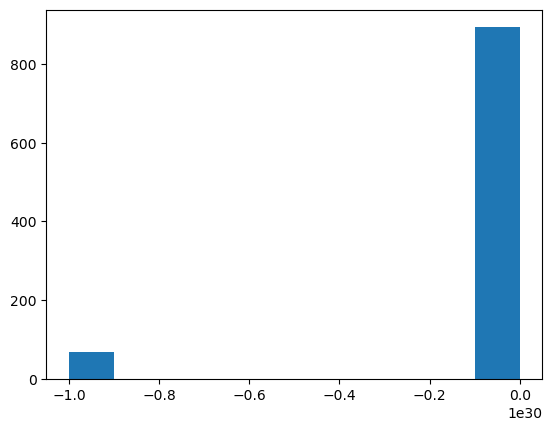

In [19]:
plt.hist(fr.scat['VIGNET'][0].flatten())

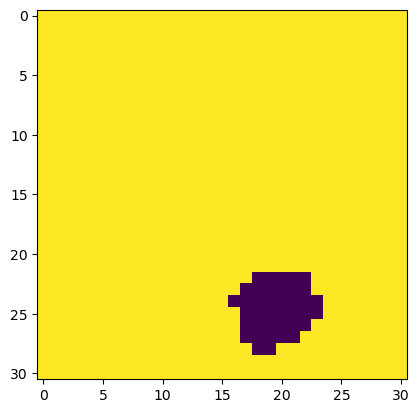

In [15]:
plt.imshow(fr.scat['VIGNET'][8])